OpenCV (정식 명칭 : Open Source Computer Vision Library )은 오픈 소스 컴퓨터 비전 라이브러리
1. 필터링
2. 행렬 연산
3. 객체 추적 (Object Tracking)
4. 세분화 (Segmentation)
5. 카메라 캘리브레이션 (Calibration)
6. 특징점 추출
7. 물체 인식 (Object recognition)
8. 기계 학습 (Machine learning)
9. 파노라마 (Stitching)
10. 컴퓨터 테이 셔널 포토 그래피 (Computational Photography)


In [ ]:
!pip install opencv-python

In [ ]:
!pip install opencv-contrib-python  

이미지 데이터 -> ndarray + scikit -image
1. numpy에서 배열로 이미지를 로드
2. numpy에서 배열로 이미지를 저장
3. 이미지 처리 : 화소값의 처리
4. 단색 이미지 결합
5. 화소 반전, 감색 처리
6. 사칙 연산을 이용 감마값 구한 다음 보정
7. 슬라이싱 작업
8. 알파값 블렌딩 마스크 처리
9. 회정 / 사진비교

In [3]:
# 1. numpy에서 배열로 이미지를 로드 np.array() / PIL.image.open()  -> shape
from PIL import Image
import numpy as np

im = np.array(Image.open('myImg\\Lenna.png'))  # 파일경로

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이), 열(폭), 색상(채널)

# RGB(빨강, 그린, 파랑) Image.open()
# BGR(파랑, 그린, 빨강)  cv2.imread()
# BGR과 RGB의 변환 = cvtColor

<class 'numpy.ndarray'>
uint8
(256, 256, 3)


<class 'numpy.ndarray'>
uint8
(256, 256)
True
float64
float64
<class 'numpy.ndarray'>


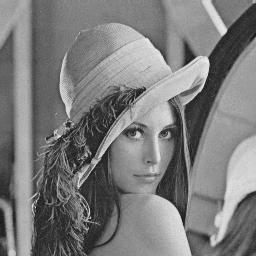

In [1]:
# 1. numpy에서 배열로 이미지를 로드 np.array() / PIL.image.open() -> shape
# 이미지를 오픈 한 후 흑백으로 변환 차원으로 리턴해보자 PIL.image.open().convert('L')
from PIL import Image
import numpy as np

im = np.array(Image.open('myImg\\Lenna.png').convert('L'))  # 파일경로

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이), 열(폭), 색상(채널)
print(im.flags.writeable)
# 쓰기금지 = im.flags.writeable

# uint8  -> float
res = im.astype(np.float64)
print(res.dtype)

im02 = np.array(Image.open('myImg\\Lenna.png'), np.float64)  # 타입변환
print(im02.dtype)
print(type(im02))
Image.fromarray(im)

In [52]:
# 2. numpy에서 배열로 이미지를 저장 
# Image.fromarray(ndarray) -> save()

pil_img = Image.fromarray(im)
print(type(pil_img), pil_img.mode)
pil_img.save('myImg\\temp\\LennaG.jpg')
# print(dir(pil_img))

pil_img02 = Image.fromarray(im02.astype(np.uint8))
print(type(pil_img02), pil_img02.mode)
pil_img02.save('myImg\\temp\\Lenna_C.png')
# 유형 변환 0~255까지의 RGB  -> 화소값 변환 0.0 ~ 1.0 표현값
# uint8 -> astype() -> / -> 스케일링 작업 -> 값*255 -> astype() -> save()
# jpg(1~95)이며 기본값은 75

<class 'PIL.Image.Image'> L
<class 'PIL.Image.Image'> RGB


In [35]:
# 3. 이미지 처리 : 화소값의 처리
# 인덱스 []에서 좌표를 지정하여 최소값을 리턴 받는다
# 행, 열의 순서로 지정. 만약 좌표로 생각한다면 y,x 순서 주의

from PIL import Image
import numpy as np

im = np.array(Image.open('myImg\\Lenna.png'))  # 파일경로

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이), 열(폭), 색상(채널)

# ex) 100행의 150번째 화소값(RGB)을 리턴 받자  
print(im[100,150])  # RGB(r,g,b) = (210, 168, 154)

R,G,B = im[100,150]
print(R)
print(G)
print(B)

<class 'numpy.ndarray'>
uint8
(256, 256, 3)
[210 168 154]
210
168
154


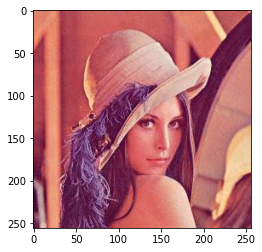

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open('myImg\\Lenna.png')
res = np.asarray(im)
plt.imshow(res)

In [1]:
# 4. 단색 이미지 결합
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open('myImg\\Lenna.png'))  # 이미지를 배열의 객체로 변환

im_R = im.copy()  # 배열객체 복사
im_R[:, :, (1,2)] = 0

im_G = im.copy()  # 배열객체 복사
im_G[:, :, (0,2)] = 0

im_B = im.copy()  # 배열객체 복사
im_B[:, :, (0,1)] = 0

# concatenate, stack, block = 배열의 결합
im_RGB = np.concatenate( (im_R, im_G, im_B), axis=1)

res_img = Image.fromarray(im_RGB)
res_img.save('myImg\\temp\\LennaRGB.png')

im_RGB02 = np.hstack( (im_R, im_G, im_B))

res_img02 = Image.fromarray(im_RGB02)
res_img02.save('myImg\\temp\\LennaRGB02.png')

In [48]:
# 5. 화소 반전, 감색 처리
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open('myImg\\Lenna.png'))  # 이미지를 배열의 객체로 변환
im_r = 255 - im

Image.fromarray(im_r).save('myImg\\temp\\Lenna_RES.png')


In [55]:
# 5. 감색 처리 : 수를 줄임
# // 로 나눈 나머지를 버린 값을 다시 곱하면 픽셀값의 색상 수를 줄일 수 있다.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open('myImg\\Lenna.png'))  # 이미지를 배열의 객체로 변환
im_r = im // 32 * 32
im_r02 = im // 128 * 128

im_RGB = np.concatenate( (im, im_r, im_r02), axis=1)

Image.fromarray(im_RGB).save('myImg\\temp\\Lenna_Res_color.png')


In [58]:
# 6. 사칙 연산을 이용 감마값 구한 다음 보정
from PIL import Image
import numpy as np

im = np.array(Image.open('myImg\\Lenna.png'))
im01 = 255.0 * (im / 255.0) ** (1 / 2.2)
im02 = 255.0 * (im / 255.0) ** 2.2

im_gamma = np.concatenate( (im01, im, im02), axis=1)

# 연산 후 datatype이 float로 변환되기 때문에 캐스팅을 해준다
pil_img = Image.fromarray(np.uint8(im_gamma))
pil_img.save('myImg\\temp\\Lenna_numpy_gamma.png')

In [59]:
# 7. 슬라이싱 작업
from PIL import Image
import numpy as np

im = np.array(Image.open('myImg\\Lenna.png'))
print(im.shape)

im_trim1 = im[50:195, 50:200]
print(im_trim1.shape)

Image.fromarray(im_trim1).save('myImg\\temp\\Lenna_numpy_trim.png')

(256, 256, 3)
(145, 150, 3)
